In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Part 1: Data Cleaning and Preparation**

***How do you load the dataset into a Pandas DataFrame?***

In [271]:
retail=pd.read_excel('/content/drive/MyDrive/DEPI/Python_Assignment/Online Retail.xlsx')

In [334]:
sns.set_palette("Accent_r")

In [273]:
retail.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


How many missing values are there in each column?
What would be the best approach to handle these missing values?
How do you convert the InvoiceDate column to a datetime format?
Why is it important to convert this column to datetime?
How can you extract additional features such as Month, Day, and Hour from the InvoiceDate column?
How do you identify and remove rows with erroneous data, such as negative quantities or incorrect order dates?
How can you extract city and country information from the Country column?


***How many missing values are there in each column?***

In [274]:
retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [275]:
missing_values = retail.isnull().sum()
missing_percentage = (missing_values / len(retail)) * 100
print(missing_percentage)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


***What would be the best approach to handle these missing values?***

In [276]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [277]:
#number of unique values in the null columns
unique_Description = retail['Description'].nunique()
print("Number unique Description:", unique_Description)

Number unique Description: 4223


In [278]:
#number of unique values in the null columns
unique_CustomerID = retail['CustomerID'].nunique()
print("Number of CustomerID:", unique_CustomerID)

Number of CustomerID: 4372


We ’re analyzing sales data/purchase patterns, so dropping customer id will not add additional insights. Also we can use invoice No instead to get the same results

In [279]:
retail.drop(columns=['CustomerID'],inplace=True)

In [280]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [281]:
retail["Description"].fillna("Unknown",inplace=True)

<ipython-input-281-12fe3082713a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retail["Description"].fillna("Unknown",inplace=True)


*We will fill with Unknown for consistency but we will use StockCode as indicator for description:. This is because StockCode is unique for each description*

***How do you convert the InvoiceDate column to a datetime format?***

In [282]:
retail["InvoiceDate"]=pd.to_datetime(retail["InvoiceDate"])

*This is important to be able to extract days, months, or years*


In [283]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


***How can you extract additional features such as Month, Day, and Hour from the InvoiceDate column?***

In [284]:
#days
retail["InvoiceDate"].dt.day

,InvoiceDate
0,1
1,1
2,1
3,1
4,1
...,...
541904,9
541905,9
541906,9
541907,9


In [285]:
#months
retail["InvoiceDate"].dt.month

,InvoiceDate
0,12
1,12
2,12
3,12
4,12
...,...
541904,12
541905,12
541906,12
541907,12


In [286]:
#year
retail["InvoiceDate"].dt.year

,InvoiceDate
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
541904,2011
541905,2011
541906,2011
541907,2011


In [287]:
retail["InvoiceDate"].dt.year.unique()

array([2010, 2011], dtype=int32)

***How do you identify and remove rows with erroneous data, such as negative quantities or incorrect order dates?***

*Negative Quantities*

In [288]:
retail[retail["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,United Kingdom


In [289]:
retail = retail[retail["Quantity"] > 0]


In [290]:
retail[retail["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country


*Date*

In [291]:
retail["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [292]:
retail["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [293]:
retail["InvoiceDate"]=pd.to_datetime(retail["InvoiceDate"],errors='coerce')

***How can you extract city and country information from the Country column?***

In [294]:
retail["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [295]:
retail.groupby("Country")["Quantity"].sum().max()


4733819

In [296]:
retail.groupby("Country")["Quantity"].sum().idxmax()


'United Kingdom'

# **Part 2: Exploratory Data Analysis (EDA)**

In [297]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


***What are the top 10 products by sales volume?***

In [298]:
retail["Sales"]=retail["Quantity"]*retail["UnitPrice"]

In [299]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


StockCode is unique for each description

In [300]:
Top_Sales=retail.groupby("StockCode")["Sales"].sum().sort_values(ascending=False).head(10)
Top_Sales

,Sales
StockCode,
DOT,206248.77
22423,174484.74
23843,168469.60
85123A,104518.80
47566,99504.33
85099B,94340.05
23166,81700.92
M,78110.27
POST,78101.88


***What is the distribution of orders by month?***





<ipython-input-335-c64912ae89e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['YearMonth'] = retail['InvoiceDate'].dt.to_period('M')


Text(0.5, 1.0, 'Distribution of Orders by Month')

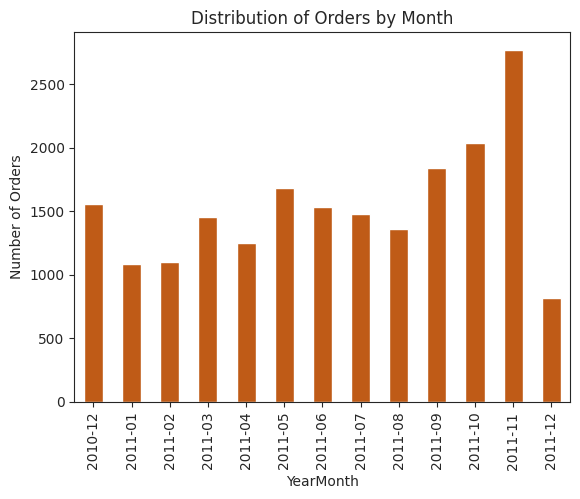

In [335]:
retail['YearMonth'] = retail['InvoiceDate'].dt.to_period('M')
retail.groupby('YearMonth')['InvoiceNo'].nunique().plot(kind='bar')
plt.xlabel('YearMonth')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Month')

In [303]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12


***What is the best time of day to advertise products?***

In [304]:
retail['Hour'] = retail['InvoiceDate'].dt.to_period('H')
sales_by_hour = retail.groupby('Hour')['Sales'].sum()
sales_by_hour.sort_values(ascending=False)

<ipython-input-304-ca84017b15d9>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  retail['Hour'] = retail['InvoiceDate'].dt.to_period('H')


,Sales
Hour,
2011-12-09 09:00,171679.08
2011-01-18 10:00,78348.66
2011-11-07 17:00,54089.63
2011-11-14 17:00,51911.26
2010-12-07 15:00,42525.67
...,...
2011-05-18 17:00,0.00
2011-02-04 17:00,0.00
2011-09-14 17:00,0.00


***Which product category is the most popular?***


<ipython-input-337-068893e5ecdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Hour'] = retail['InvoiceDate'].dt.hour


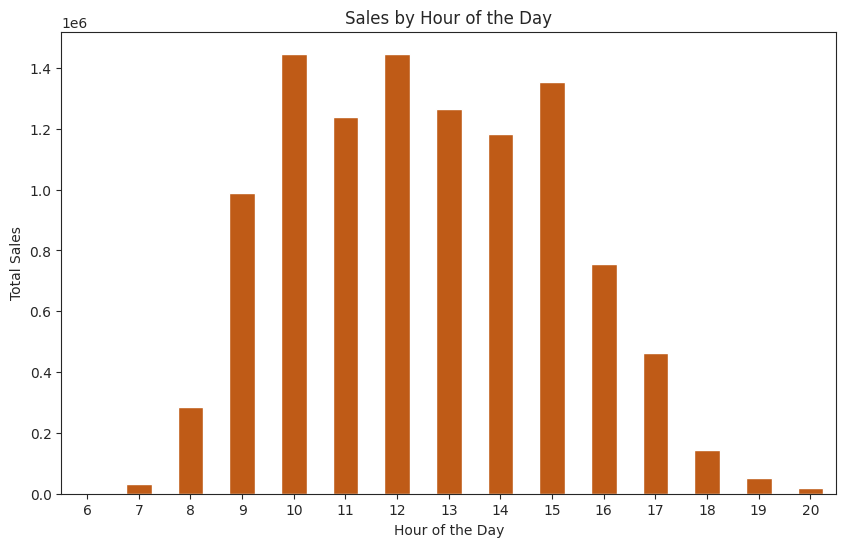

In [337]:
retail['Hour'] = retail['InvoiceDate'].dt.hour
sales_by_hour = retail.groupby('Hour')['Sales'].sum()
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Sales by Hour of the Day')
plt.xticks(rotation=0)
plt.show()

In [323]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'Sales', 'YearMonth', 'Hour'],
      dtype='object')

In [325]:
sales_by_hour.sort_values(ascending=False)

,Sales
Hour,
10,1446742.701
12,1444245.880
15,1352972.180
13,1265736.300
11,1239954.440
14,1181812.371
9,990267.821
16,754006.560
17,461603.491


In [307]:
stock_code_counts=retail["StockCode"].value_counts().value_counts()
stock_code_counts

,count
count,
1,152
2,128
3,98
4,75
8,67
...,...
525,1
534,1
537,1


In [308]:
tock_code_counts = retail["StockCode"].value_counts()
top_10_repetitive_stock_codes = stock_code_counts.nlargest(10)
top_10_repetitive_stock_codes

,count
count,
1,152
2,128
3,98
4,75
8,67
5,67
10,58
7,51
6,48


***Which countries have the highest sales volume?***

In [309]:
retail.groupby("Country")["Sales"].sum().sort_values(ascending=False)

,Sales
Country,
United Kingdom,9003097.964
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110
Australia,138521.310
Spain,61577.110
Switzerland,57089.900
Belgium,41196.340


***Are there any patterns in sales distribution by country?***

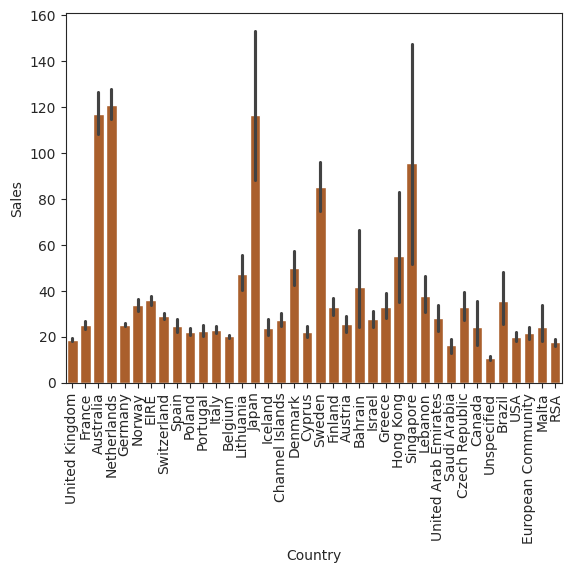

In [338]:
sns.barplot(x='Country', y='Sales', data=retail)
plt.xticks(rotation=90)
plt.show()

**Highest Sales**
United Kingdom

**Moderate Sales**:
Some countries like Germany, France, and the Netherlands

**Lower Sales:**
Finland, Bahrain, and Sweden, have lower sales

**Standard Deviation / Error Bars:**

The error bars indicate variability(e.g., Japan, Ireland) suggest that there is significant variability in sales.

# **Part 3: Data Visualization**

***How can you visualize the sales trend over the year?***

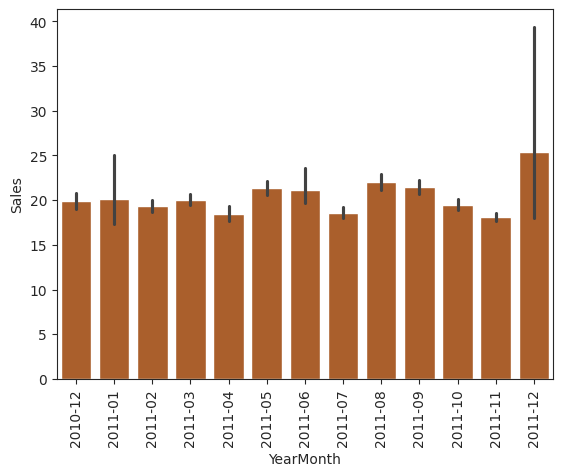

In [339]:
sns.barplot(x='YearMonth', y='Sales', data=retail)
plt.xticks(rotation=90)
plt.show()

***How can you create a bar chart to compare sales across different product categories?***

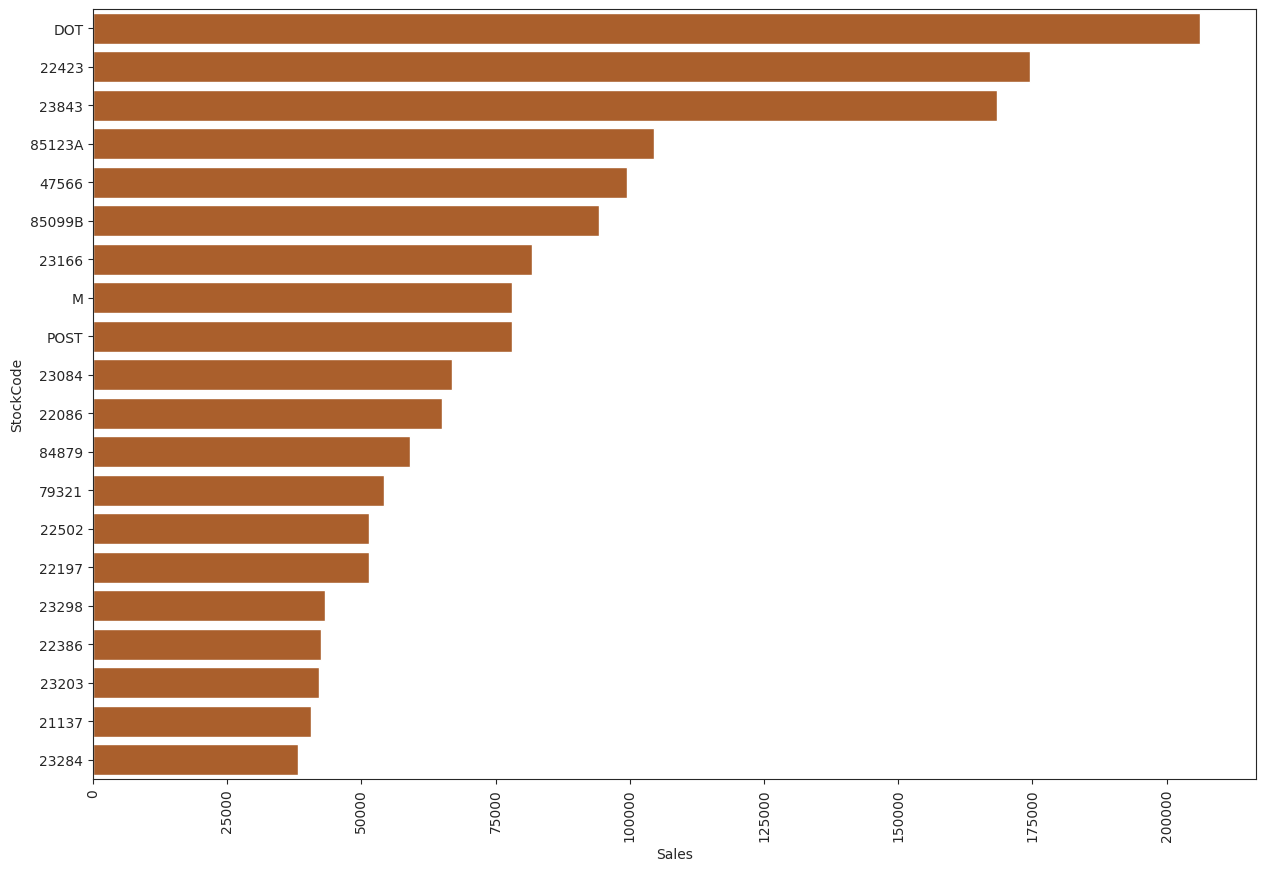

In [340]:
plt.figure(figsize=(15, 10))
stock_sales = retail.groupby('StockCode')['Sales'].sum().reset_index()
top_20_stock_sales = stock_sales.sort_values(by='Sales', ascending=False).head(20)
sns.barplot(y='StockCode', x='Sales', data=top_20_stock_sales)
plt.xticks(rotation=90)
plt.show()

***How can you plot the relationship between product price and quantity sold?***

In [313]:
retail = retail[retail["UnitPrice"] > 0]

In [314]:
# Merge to get the original data for the top 20 StockCodes
top_20_stock_sales = retail[retail['StockCode'].isin(top_20_stock_sales['StockCode'])]

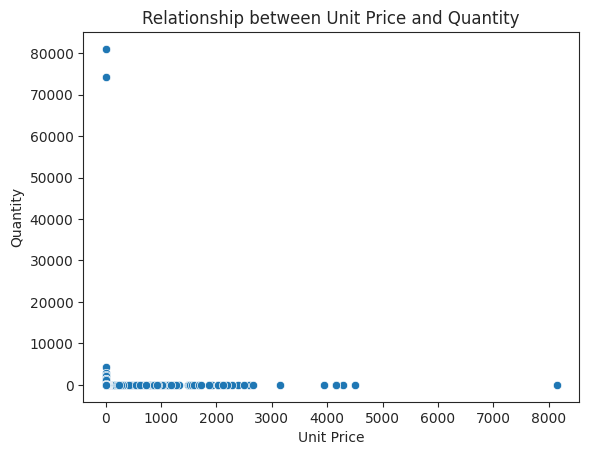

In [315]:
sns.scatterplot(x='UnitPrice', y='Quantity', data=top_20_stock_sales)
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title('Relationship between Unit Price and Quantity')
plt.show()

In [316]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

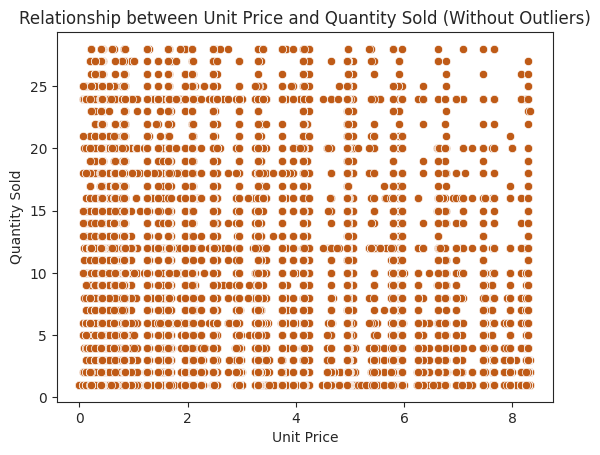

In [341]:
retail_clean = remove_outliers(retail, 'UnitPrice')
retail_clean = remove_outliers(retail_clean, 'Quantity')

sns.scatterplot(x='UnitPrice', y='Quantity', data=retail_clean)

plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.title('Relationship between Unit Price and Quantity Sold (Without Outliers)')

plt.show()


***How can you use a heatmap to explore correlations between different features?***

<Axes: >

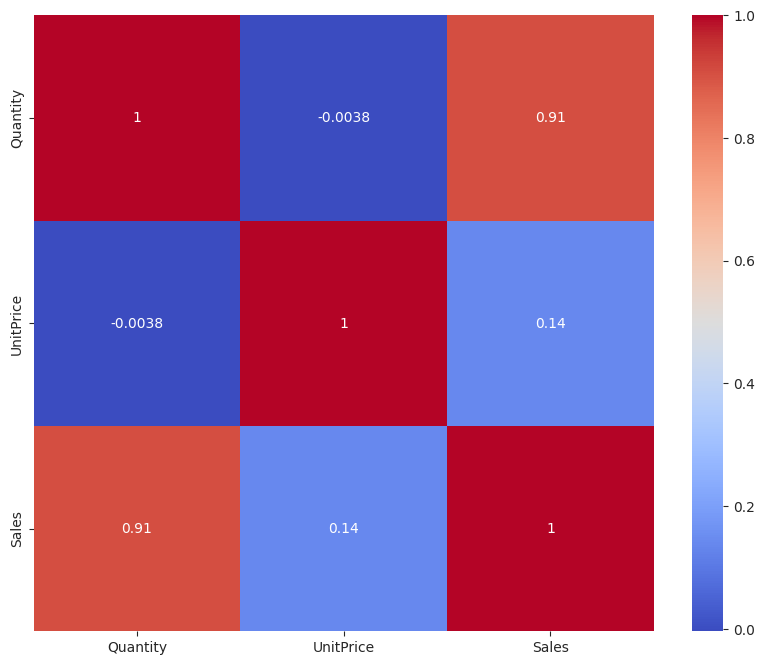

In [342]:
retail_numeric = retail.select_dtypes(include=['float64', 'int64'])
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(retail_numeric.corr(), annot=True, cmap='coolwarm')